# Seaborn Visualizations
**with some matplotlib code**

This notebook does the following:
- practices visualizations on the titanic dataset using the Seaborn Python package.
- compares select equivalent visualizations using the Matlotlib package.
- considers categorical and continuous variables

and has 3 sections:

1. load titanic data
2. plot univariate data
3. plot bivariate data

## Quick Recap: Variable and Data Types

        
### 1. *Categorical vs Random Variables*


A **categorical variable** represents data that can be categorized and/or divided into groups.
- Examples variables are race, gender, and educational level.

A **random variable** X is a variable whose possible values are numerical outcomes of a random phenomenon. 
- A **discrete variable** is represented by data which can only take on countable number of distinct values, e.g. 0,1,2,3,4. Probability histograms are used to describe the distribution of discrete random variables.
- A **continuous variable** is represented by data that can take an infinite number of possible values. Probabilty dnesity curves are used to describe the distribution of continuous random variables.
        
### 2. *Univariate vs Bivariate Data*

**Univariate data** involves one variable.

**Bivariate data** involves more than one variable.
        
## Resources

- https://www.kaggle.com/zachgold/python-iris-data-visualizations
- https://www.kaggle.com/sonu1401/titanic-seaborn-visulization
- https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
- https://serialmentor.com/dataviz/histograms-density-plots.html
- https://seaborn.pydata.org/tutorial/categorical.html
- https://seaborn.pydata.org/tutorial/distributions.html
- http://www.stat.yale.edu/Courses/1997-98/101/stat101.htm

# 0. Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load titanic dataset from seaborn package

In [2]:
sns.get_dataset_names() 

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Plot univariate data

# Barplot
- discrete/categorical variable

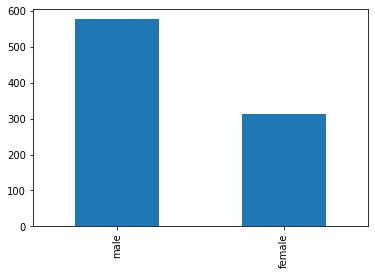

In [5]:
df.sex.value_counts().plot.bar() # matplotlib
                                 # can also use .plot(kind="bar") 

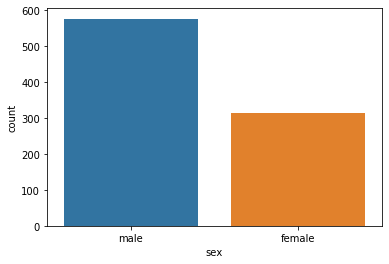

In [6]:
sns.countplot(x="sex",data=df) # seaborn

## Histogram and Probabilty Density Distribution 

- continuous variable

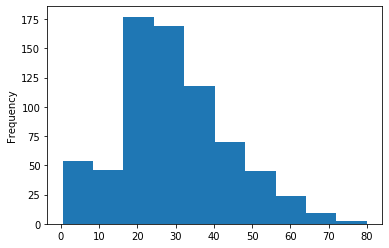

In [7]:
df.age.plot.hist()  # matplotlib
                     # use bins = to set number of bins

[ 54.  46. 177. 169. 118.  70.  45.  24.   9.   2.]


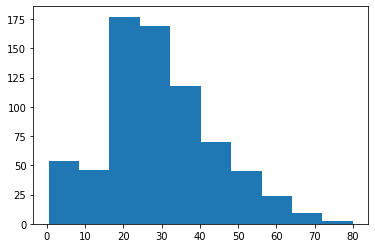

In [8]:
(n, bins, patches) = plt.hist(df.age, bins=10, label='hst')
print(n) # print counts per bin

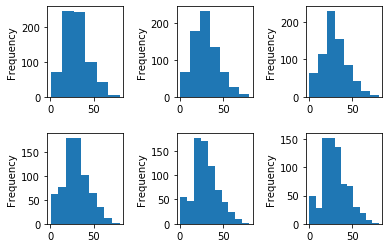

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.7)  # adjusts spacing between subplots
for i in range(1,7):                         # subplots to compare bin sizes
    plt.subplot(2, 3, i)
    df.age.plot.hist(bins=i+5)

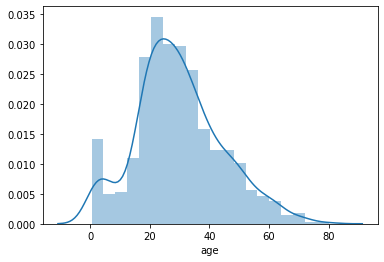

In [10]:
sns.distplot(df.age.dropna(), hist=True, kde=True) # seaborn
                                                   # counts per bin size
                                                   # shows histogram and kde

Text(0.5, 1.0, 'Density Plot + Histogram + Rug Plot of Age')

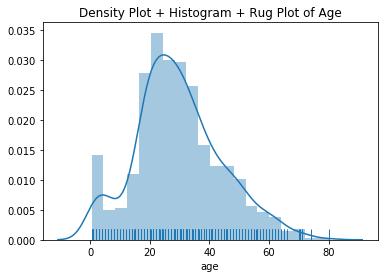

In [11]:
sns.distplot(df.age.dropna(), hist=True, kde=True, rug=True)   # seaborn
                                                               # counts per bin size
                                                               # shows histogram, kde, and rug
plt.title('Density Plot + Histogram + Rug Plot of Age')        # add labels
#plt.xlabel('Age (years)')
#plt.ylabel('Density')

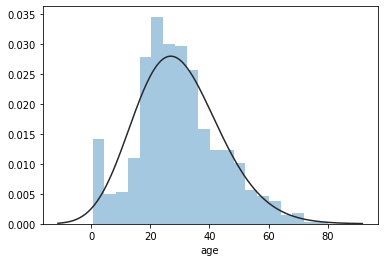

In [12]:
from scipy import stats
sns.distplot(df.age.dropna(), kde=False, fit=stats.gamma)      # add gamma distribution fit

## Kernal Density Estimate (KDE) Plot

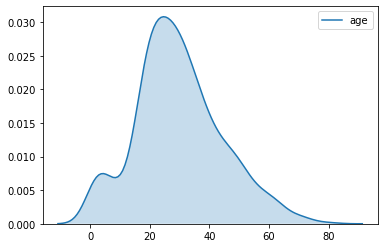

In [13]:
sns.kdeplot(df.age, shade=True) # seaborn

## Boxplot
- continuous variable

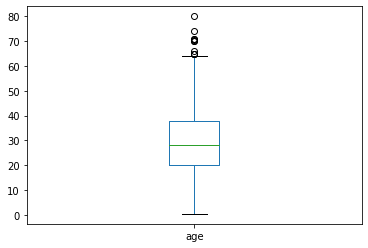

In [14]:
df.age.plot(kind="box") # matplotlib

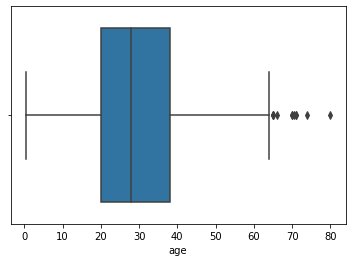

In [15]:
sns.boxplot(df.age) # seaborn

# 3. Plot bivariate data

## Bar Plot (x,y)

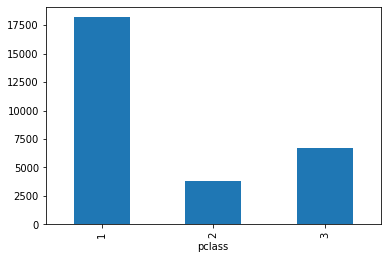

In [16]:
df.groupby('pclass').agg('sum')['fare'].plot.bar() # matplotlib

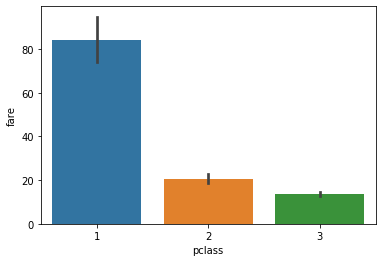

In [17]:
sns.barplot(x="pclass",y="fare",data=df)  # seaborn

In [18]:
# create df of counts per bin age by sex

# male counts per age bin
(n, bins, patches) = plt.hist(df.age[df.sex=='male'], bins=10, label='hst')
plt.close()
xm=pd.Series(n) 

# female counts per age bin
(n, bins, patches) = plt.hist(df.age[df.sex=='female'], bins=10, label='hst')
plt.close()
xf=pd.Series(n)
xf 

dictionary = {'male': xm*-1,     # create dictionary with keys and values
              'female': xf, 
              'age': list(range(0,10))}
dfage = pd.DataFrame(dictionary) # create dataframe from dictionary
dfage = dfage.sort_index(ascending=False) # sort age groups from oldest to youngest
dfage

,male,female,age
9,-2.0,8.0,9
8,-9.0,9.0,8
7,-16.0,19.0,7
6,-29.0,24.0,6
5,-46.0,35.0,5
4,-74.0,44.0,4
3,-117.0,47.0,3
2,-109.0,41.0,2
1,-23.0,11.0,1
0,-28.0,23.0,0


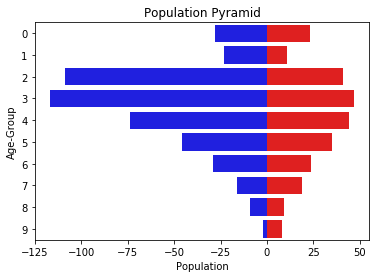

In [19]:
# plot population pyramid of age counts by sex
bar_plot=sns.barplot(x='male', y='age', color='blue', data=dfage, orient='h', lw=0)
bar_plot=sns.barplot(x='female', y='age', color='red', data=dfage, orient='h', lw=0)
bar_plot=bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")

## Strip Plot

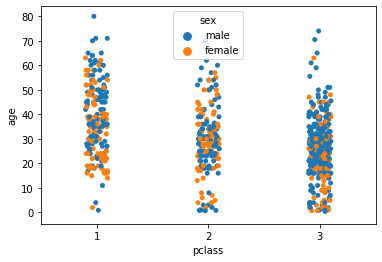

In [20]:
sns.stripplot(x='pclass', y='age', hue='sex', data=df, jitter=True)

## Density Plot (comparing distributions)

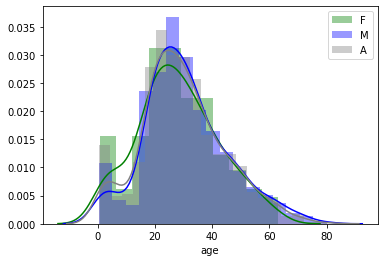

In [21]:
## distributions plotted together

f=df[df.sex=='female'].dropna(subset=['age'])  # drop rows where age has na
m=df[df.sex=='male'].dropna(subset=['age'])    # drop rows where age has na
a=df.dropna(subset=['age'])                    # drop rows where age has na

sns.distplot(f.age, color='g')
sns.distplot(m.age, color='b')
sns.distplot(a.age, color='gray')
plt.legend('FMA', ncol=1, loc='upper right')

Text(0.5, 1.0, 'all')

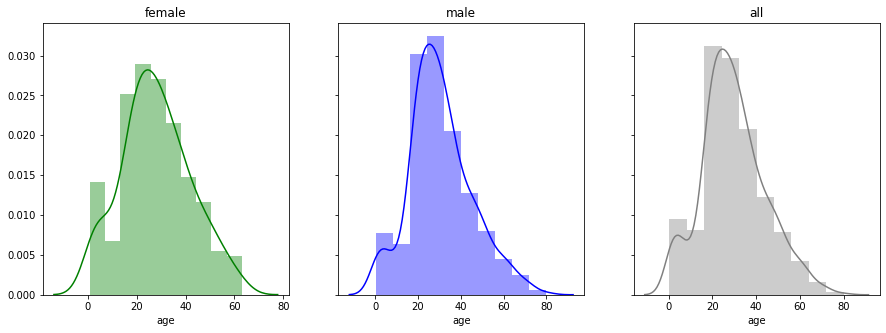

In [22]:
# distributions plotted separately

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))
sns.distplot(f.age, color='g', ax=axes[0], bins=10)
axes[0].set_title('female')
sns.distplot(m.age, color='b', ax=axes[1], bins=10)
axes[1].set_title('male')
sns.distplot(a.age, color='gray', ax=axes[2], bins=10)
axes[2].set_title('all')

Text(0.5, 1.0, 'all passengers')

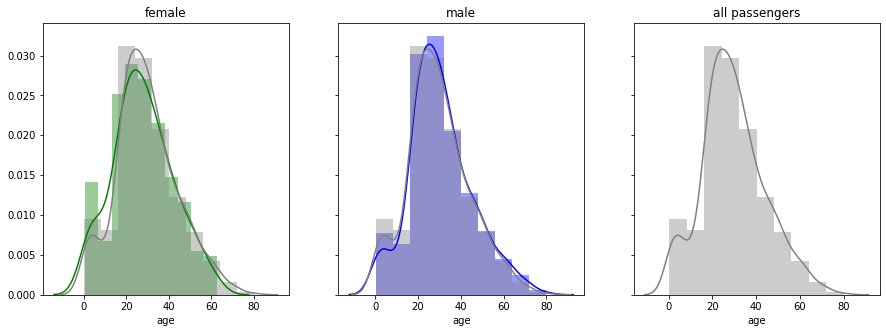

In [23]:
# distributions plotted against all

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))
sns.distplot(f.age, color='g', bins=10, ax=axes[0])
sns.distplot(a.age, color='gray', bins=10, ax=axes[0])
axes[0].set_title('female')
sns.distplot(m.age, color='b', bins=10, ax=axes[1])
sns.distplot(a.age, color='gray', bins=10, ax=axes[1])
axes[1].set_title('male')
sns.distplot(a.age, color='gray', bins=10, ax=axes[2])
axes[2].set_title('all passengers')

Text(0.5, 1.0, 'all passengers')

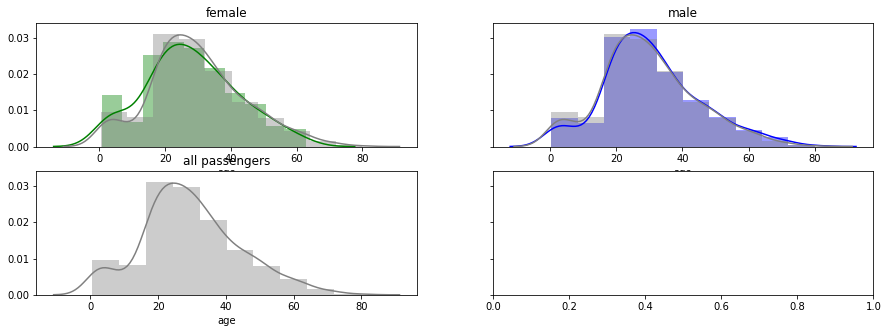

In [24]:
# distributions plotted against all on 2x2 suplots

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True, figsize=(15,5))
sns.distplot(f.age, color='g', bins=10, ax=axes[0,0])
sns.distplot(a.age, color='gray', bins=10, ax=axes[0,0])
axes[0,0].set_title('female')
sns.distplot(m.age, color='b', bins=10, ax=axes[0,1])
sns.distplot(a.age, color='gray', bins=10, ax=axes[0,1])
axes[0,1].set_title('male')
sns.distplot(a.age, color='gray', bins=10, ax=axes[1,0])
axes[1,0].set_title('all passengers')

## Box Plot (x,y)
- continuous data

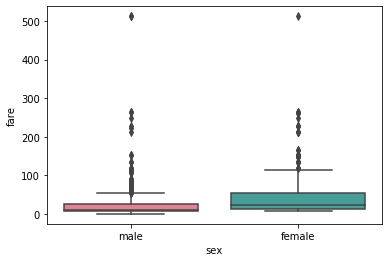

In [25]:
sns.boxplot(x="sex", y="fare", palette="husl", data=df)

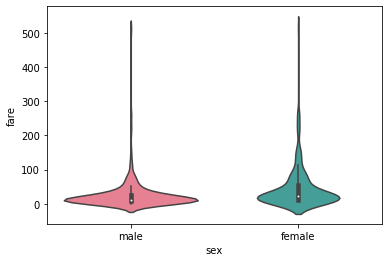

In [26]:
sns.violinplot(x="sex", y="fare", palette="husl", data=df) # also shows density

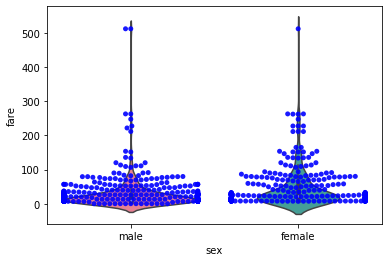

In [27]:
sns.violinplot(x="sex", y="fare", palette="husl", data=df)
sns.swarmplot(x="sex", y="fare", data=df, color="b", alpha=.9) # shows data points

## Point Plot

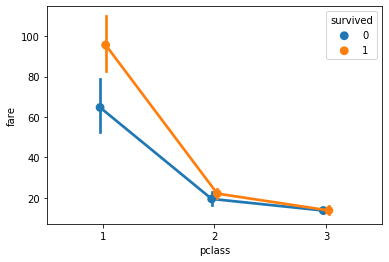

In [28]:
sns.pointplot(x='pclass', y='fare', hue='survived', data=df,
             dodge=True)

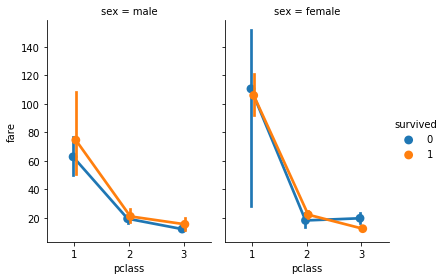

In [29]:
sns.catplot(x='pclass', y='fare',
                hue='survived', col='sex',
                data=df, kind="point",
                dodge=True,
                height=4, aspect=.7)

## Joint Plot (bar, scatter, regression, kernel density)

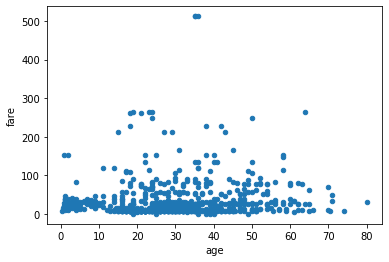

In [30]:
df.plot(kind="scatter",x="age",y="fare") # matplotlib

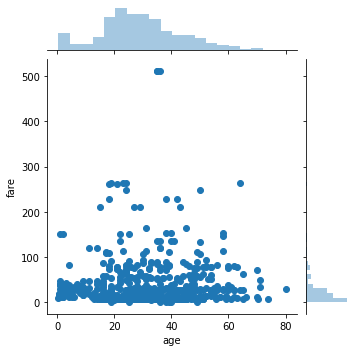

In [31]:
sns.jointplot(x="age", y="fare", data=df, size=5) # seaborn equivalent (with density)

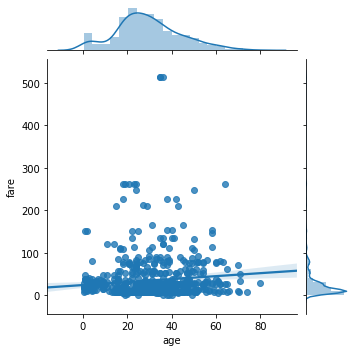

In [32]:
sns.jointplot(x="age", y="fare", data=df, size=5, kind='reg') # add regression line
                                                              # can also use sns.lmplot(x,by,data)

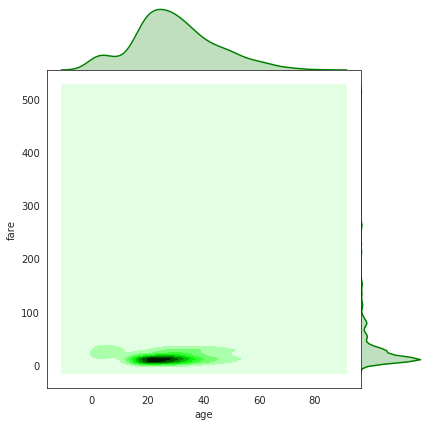

In [33]:
with sns.axes_style('white'):
    sns.jointplot("age", "fare", data=df,
                  kind="kde", space=0, color="g")

## Lm Plot (linear model)

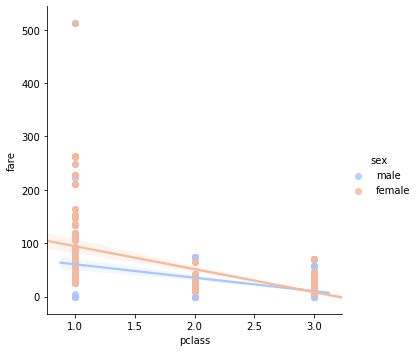

In [34]:
sns.lmplot(x='pclass', y='fare', data=df, hue='sex', palette='coolwarm')

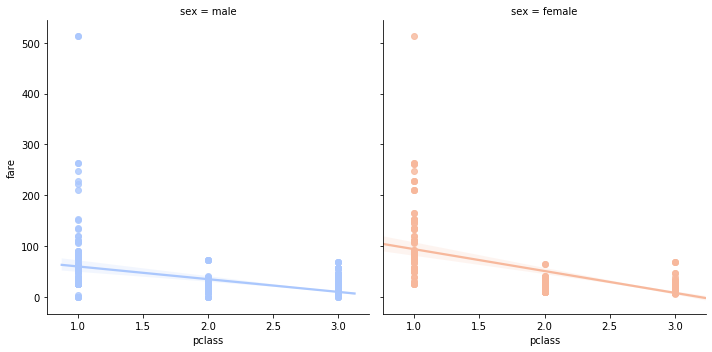

In [35]:
sns.lmplot(x='pclass', y='fare', data=df, hue='sex', palette='coolwarm', col='sex')

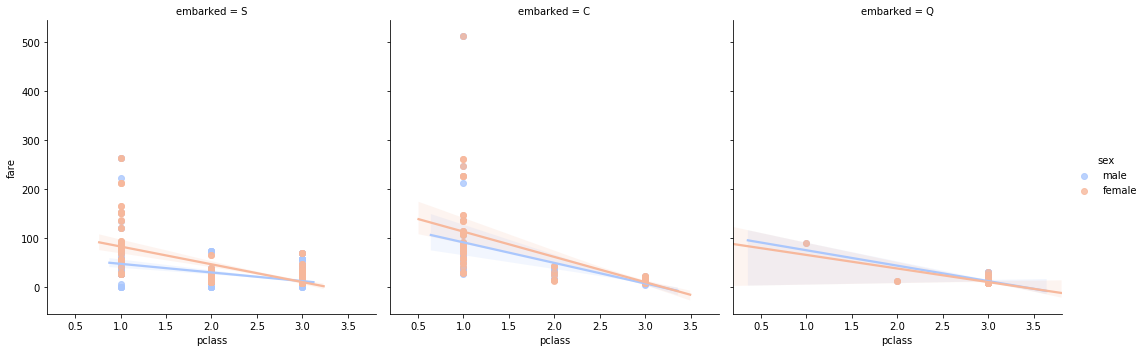

In [36]:
sns.lmplot(x='pclass', y='fare', data=df, hue='sex', palette='coolwarm', col='embarked')

## Facet Grid

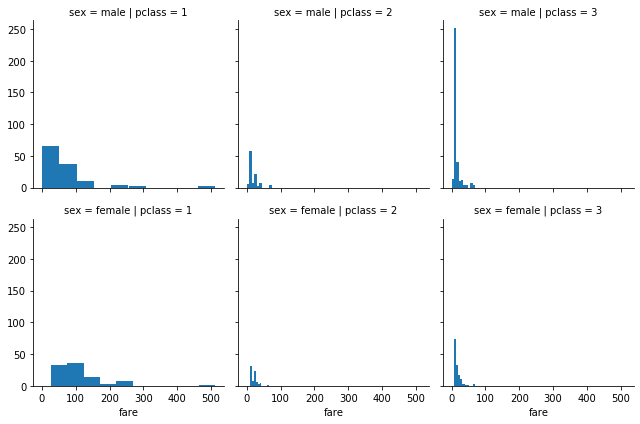

In [37]:
fg=sns.FacetGrid(df,col='pclass',row='sex') 
fg.map(plt.hist,'fare')

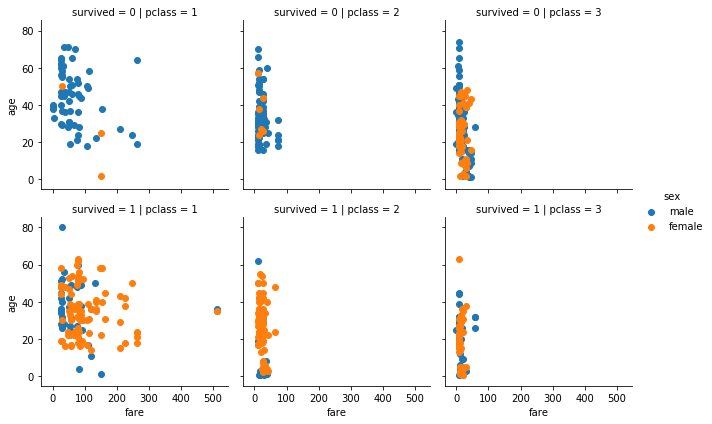

In [38]:
fg=sns.FacetGrid(df,row='survived',col='pclass',hue='sex') 
fg.map(plt.scatter,'fare','age').add_legend()

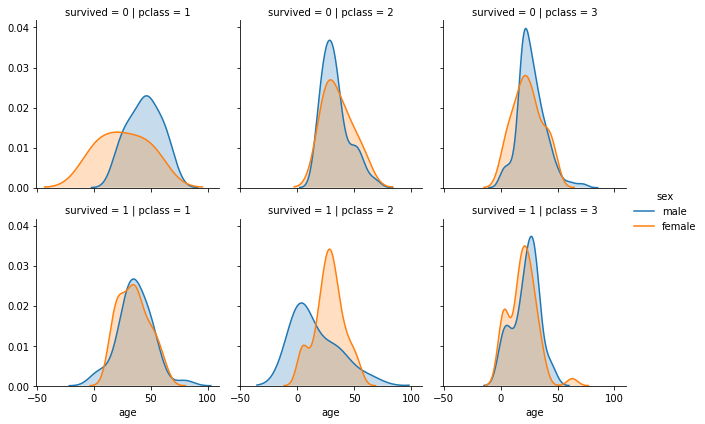

In [39]:
fg=sns.FacetGrid(df,row='survived',col='pclass',hue='sex') 
fg.map(sns.kdeplot,'age', shade=True).add_legend()

## Pair Plot

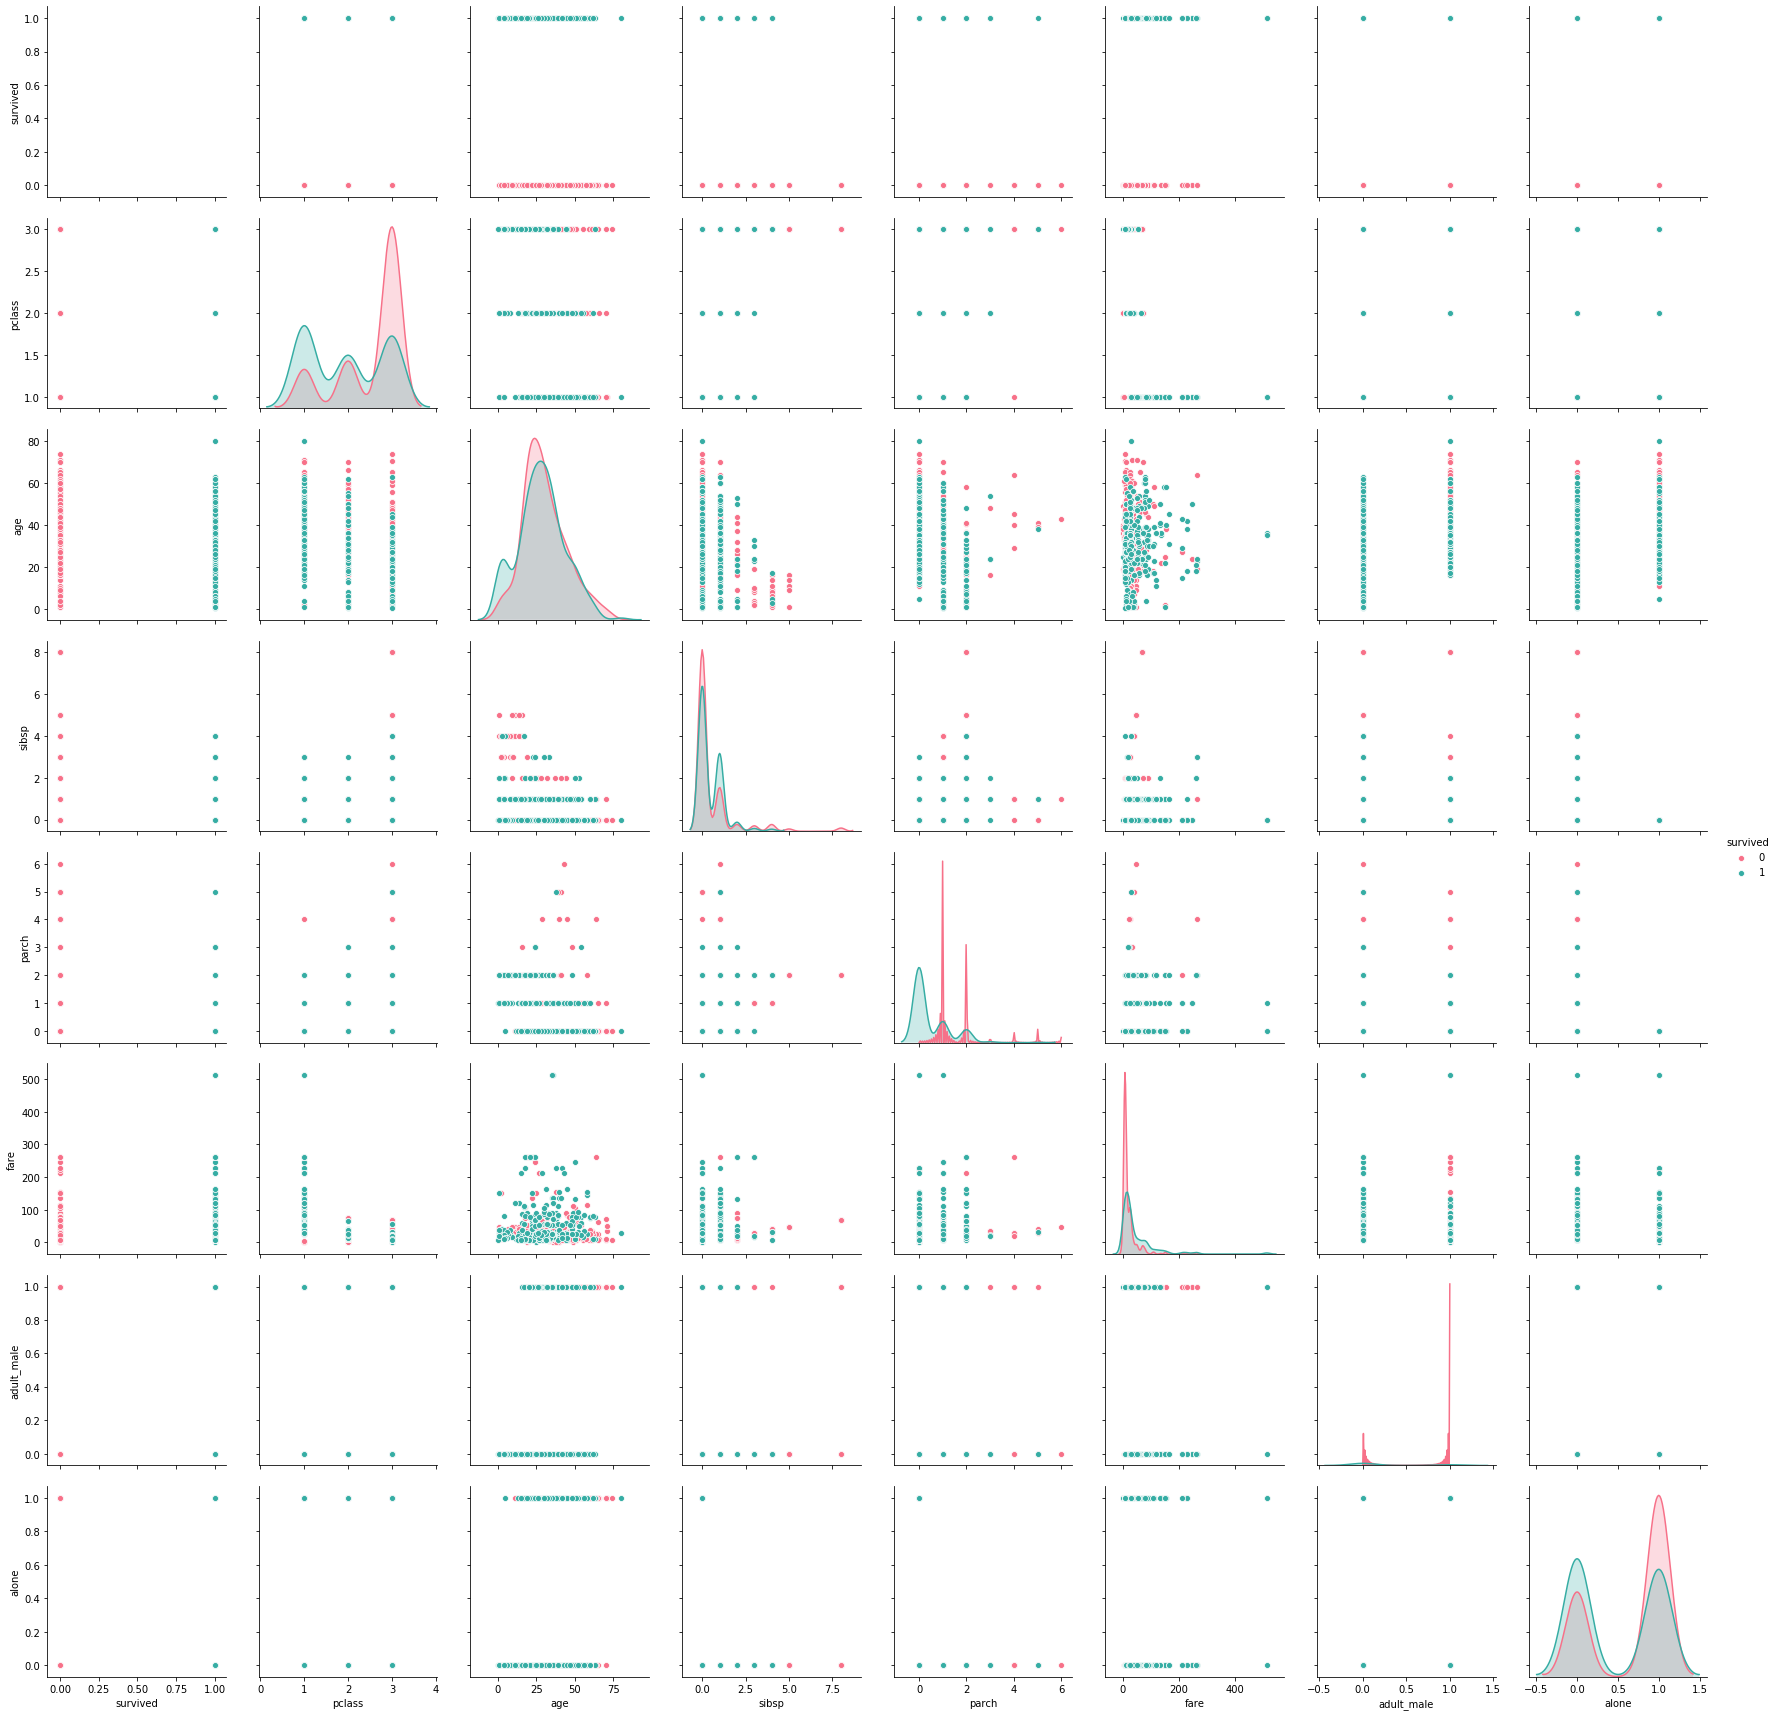

In [40]:
sns.pairplot(df, hue="survived", palette="husl", size=3)
# diag_kind="kde" or "hist"

## Coorelation Plot (sns.clustermap)

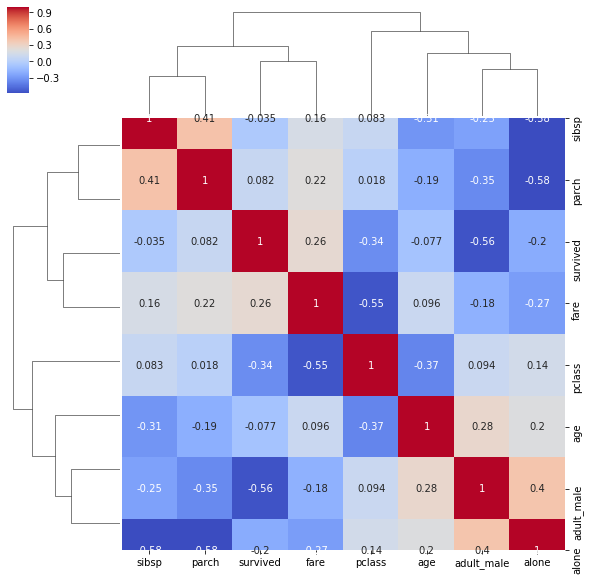

In [41]:
ax=sns.clustermap(df.corr(),cmap='coolwarm',annot=True)

## Heatmap (using pivot table)

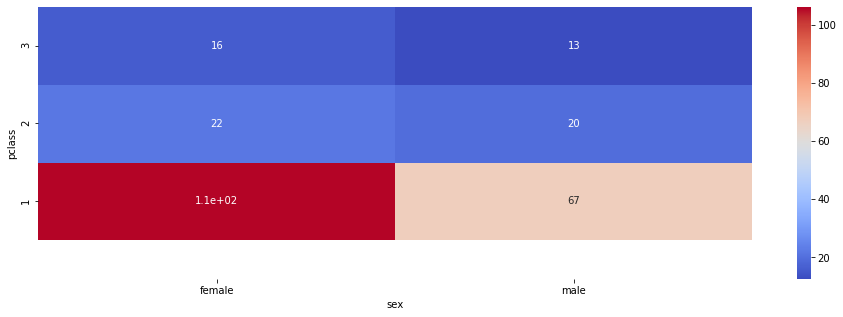

In [42]:
plt.figure(figsize = (16,5))
df_pv=df.pivot_table(values='fare',index='pclass',columns='sex')
ax=sns.heatmap(df_pv,cmap='coolwarm',annot=True)
ax=ax.set_ylim(-0.5, 3) # set the ylim to bottom, top